In [1]:
''' 
~ INTRODUCTION TO COMPUTER VISION ~
BONUS EXERCISE 1: TABLE REMOVAL

Nipun Weerakkodi
IRC-Lab
MSc-2022
Skoltech
8/12/2021
'''


# Import libraries
import cv2
from matplotlib import pyplot as plt

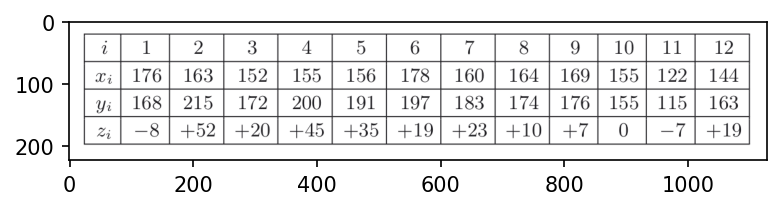

In [32]:
# load the table Image:
img = cv2.imread('table_0.png')
table = img.copy()
plt.figure(dpi=150)
plt.imshow(table)

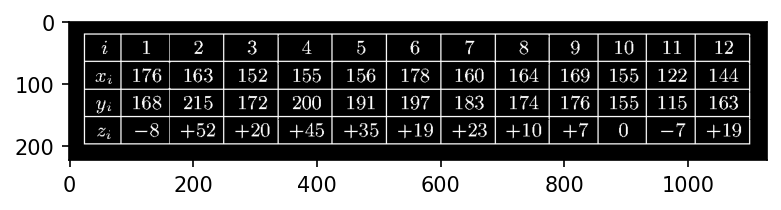

In [33]:
# Convert to gray scale and apply Otsu's threshold:
gray = cv2.cvtColor(table, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
plt.figure(dpi=150)
plt.imshow(thresh, cmap='gray')

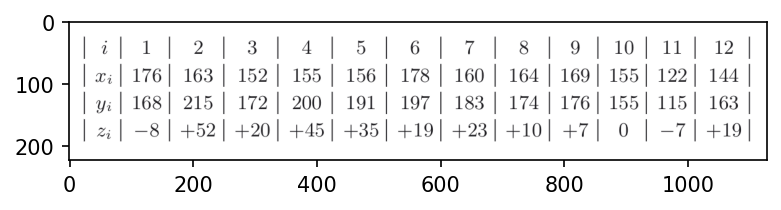

In [37]:
# remove horizontal line:
hor_kernal = cv2.getStructuringElement(cv2.MORPH_RECT,(35,1))
rmv_hor = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, hor_kernal, iterations=2)
cnts = cv2.findContours(rmv_hor, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(table, [c], -1, (255,255,255),5)
plt.figure(dpi=150)
plt.imshow(table)

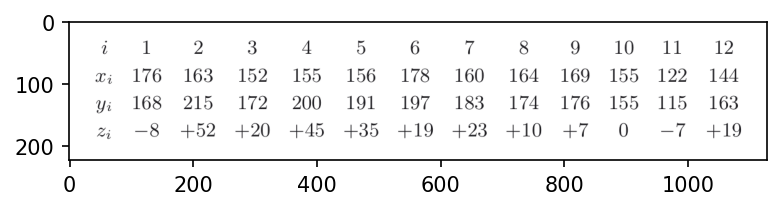

In [38]:
# remove verticale lines:
hor_kernal = cv2.getStructuringElement(cv2.MORPH_RECT,(1,35))
rmv_hor = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, hor_kernal, iterations=2)
cnts = cv2.findContours(rmv_hor, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(table, [c], -1, (255,255,255),5)

# result:
plt.figure(dpi=150)
plt.imshow(table)

In [39]:
# save the result image:
line_removed_table = table
cv2.imwrite('line_removed_table.png', line_removed_table)

True